# Sinais degrau e impulso  em tempo contínuo

Renato Naville Watanabe

## Preparação do ambiente

In [1]:
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install ipympl

import sympy as sym
%matplotlib widget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.9 MB/s eta 0:00:00


## Sinal impulso

O sistema dinâmico mais simples em tempo contínuo é o integrador. Então é razoável querermos um sinal bem simples que ao passar por um integrador tenha seja um sinal simples, como o valor 1.

Uma primeira tentativa que alguém poderia pensar seria

$x(t) = \left\{\begin{array}{cc}1 & t= 0 \\0 & \text{c.c} \end{array}\right.$

Porém, esse sinal tem a integral com valor igual a 0.

Uma outra tentativa é um pulso. É possível construir um pulso com duração $\Delta$ e altura $1/\Delta$.

$$\delta_\Delta(t) =  \left\{\begin{array}{cc}\frac{1}{\Delta} & 0 \leq t < \Delta \\0 & \text{c.c} \end{array}\right.$$


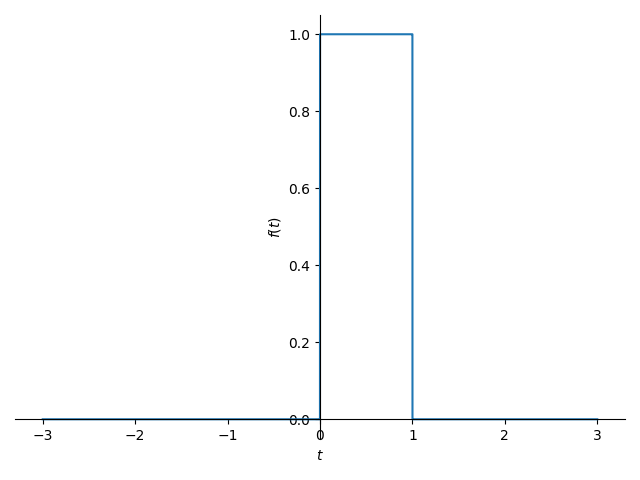

In [ ]:

t = sym.symbols('t')
x = sym.Piecewise((1, (t >= 0) & (t < 1)),
                  (0, True))

p1 = sym.plot(x, (t, -3, 3))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([0,1])
ax.set_xticklabels(['0',r'$\Delta$'])
ax.set_yticks([1])
ax.set_yticklabels([r'$\frac{1}{\Delta}$'])
ax.set_ylabel(r'$\delta_{\Delta}(t)$')
fig.canvas.draw_idle()

A área desse pulso é 1. Nós podemos fazer a duração desse pulso ser cada vez menor. Com a duração cada vez menor, a altura do pulso fica cada vez menor. Se fizermos essa duração ir para zero, no limite temos o impulso.

$\delta(t)=\displaystyle\lim_{\Delta\rightarrow0}\delta_\Delta(t) $

Então definimos o **impulso** ou **delta de Dirac**, representado pelo símbolo $\delta(t)$:

$$\delta(t) = \left\{\begin{array}{cc}\infty & ,t = 0 \\ 0& ,\text{c.c} \end{array}\right.$$

e

$$\int_{-\infty}^\infty\delta(\tau)\,d\tau = 1$$

Representamos o delta de Dirac com uma seta com a área do impulso sendo indicada do lado.

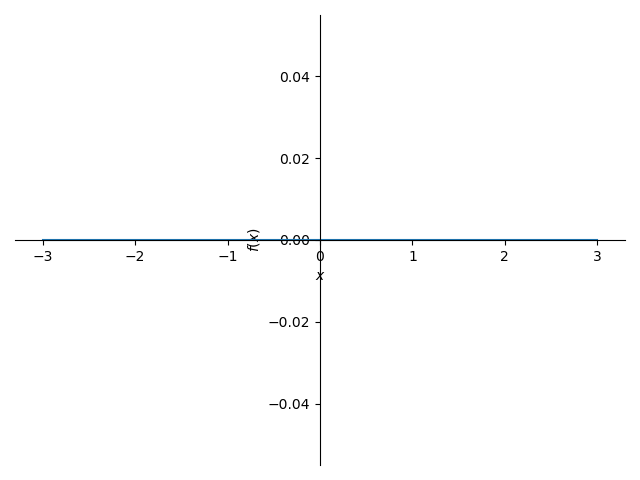

In [ ]:
t = sym.symbols('t')
x = sym.Piecewise((0, True))
y = sym.symbols('y')
p1 = sym.plot(x, (t, -3, 3))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([0])
ax.set_xticklabels(['0'])
ax.set_yticks([1])
ax.set_yticklabels(['1'])
ax.set_ylabel(r'$\delta(t)$')
ax.set_xlabel(r'$t$')
ax.arrow(0,0,0,1, width=0.03, head_width = 0.2, head_length=0.1)
fig.canvas.draw_idle()

É importante notar que o impulso é uma idealização de um sinal de grande amplitude que tem uma duração muito pequena (idealmente duração zero). Esse sinal não acontece na prática, mas nos ajuda a estudar sistemas contínuos lineares e invariantes no tempo e a ganhar intuição sobre o comportamento desses sistemas.

### Propriedade da amostragem

Ao multiplicar um sinal $x(t)$ pelo delta de Dirac, temos:

$x(t)\delta(t) = x(0)\delta(t)$

Se multiplicamos o sinal pelo impulso atrasado, temos:

$x(t)\delta(t-T) = x(T)\delta(t-T)$

Ao calcular a área desse sinal $x(t)$ multiplicado por $\delta(t-T)$, temos:

$\int_{-\infty}^\infty x(\tau)\delta(\tau-T)\,d\tau = \int_{-\infty}^\infty x(T)\delta(\tau-T)\,d\tau =  x(T)\int_{-\infty}^\infty \delta(\tau-T)\,d\tau = x(T)$

Isso significa que a área do sinal multiplicado por impulso é o valor do sinal no instante em que o impulso está localizado.

## Sinal degrau

Outro sinal que usaremos bastante é o sinal degrau. Esse sinal também é conhecido como **degrau de Heaviside**. Esse sinal é sempre igual a 1 para $t\geq 0$. Para esse sinal usaremos a letra $u$:

$$u(t) =   \left\{\begin{array}{cc}1& ,t > 0 \\ 0& ,t<0 \end{array}\right. $$

Note que o degrau não é definido para $t=0$.
O seu gráfico é mostrado abaixo:

In [ ]:
x = sym.Piecewise((1, t > 0),
                  (0, True))

p1 = sym.plot(x, (t, -4, 10))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_ylabel(r'$u(t)$')
fig.canvas.draw_idle()

Os sinais degrau e impulso estão bastante relacionados. O sinal degrau  é a integral do impulso.

$$u(t) = \int_{-\infty}^t \delta(\tau)\,d\tau$$

E, como consequência, o delta de Dirac é a derivada do degrau:

$$\delta(t) = \frac{du(t)}{dt} $$

## Exercícios

**1)** Considere um sinal periódico:

$$x(t) = \left\{\begin{array}{cc} 3 &,0\leq t<2 \\ -1&,2\leq t<3 \end{array}\right.$$

Fora desses valores de tempo, o sinal se repete, com período $T=3$.

A derivada desse sinal está relacionada ao "trem de impulsos":

$g(t) = \displaystyle\sum_{k=-\infty}^\infty\delta(t-3k)$

com período $T=3$.

Pode-se perceber que:

$\frac{dx}{dt} = A_1g(t-t_1) + A_2g(t-t_2) + A_3g(t-t_3)$

Determine os valores de $A_1$, $A_2$ e $A_3$.

**2)** Mostre que:

$$\delta(2t) = \frac{1}{2}\delta(t)$$

Dica: veja a definição da função $\delta_\Delta(t)$.

**3)** Faça gráficos dos seguintes sinais:

a) $x_1(t) = 10e^{-3t}u(t)$

b) $x_2(t) = -10e^{-0.5t}u(t)$

c) $x_3(t) = -10e^{-0.5t}u(t-5)$

d) $x_4(t) = 10(1-e^{-t})u(t)$

e) $x_5(t) = 3^{-tu(t)}$


**4)** Faça o gráfico das seguintes funções:

a) $x_1(t) = u(t-3) - u(t-7) $

b) $x_2(t) = u(t-3) + u(t-7)$

c) $x_3(t) = t^2[u(t-3) + u(t-7)]$

d) $x_4(t) = (t-3)[u(t-3) + u(t-7)]$

**5)** Escreva a função com os gráficos abaixo usando apenas uma expressão. Além disso, calcule uma expressão para as suas derivadas.

a)

In [ ]:
t = sym.symbols('t')
x = sym.Piecewise((t+2, (t >= -2) & (t < 0)),
                  (2-2*t, (t >= 0) & (t < 1)),
                  (0, True))

sym.plot(x, (t, -3, 3))


b) No gráfico abaixo, o trecho com $t$ de 0 a 1 é $t^2$.

In [ ]:
t = sym.symbols('t')
x = sym.Piecewise((t**2, (t >= 0) & (t < 1)),
                  (2-t, (t >= 1) & (t < 3)),
                  (0, True))

sym.plot(x, (t, -3, 5))

**6)** Calcule as seguintes integrais:

a) $\int_{-\infty}^\infty\delta(\tau)x(t-\tau)\,d\tau$

b) $\int_{-\infty}^\infty\delta(t-\tau)x(\tau)\,d\tau$

c) $\int_{-\infty}^\infty\delta(2\tau-4)\mathrm{sen}(\pi \tau)\,d\tau$

d) $\int_{-\infty}^\infty\delta(\tau)e^{-j\omega \tau}\,d\tau$

e) $\int_{-\infty}^\infty\delta(\tau+2)e^{-\tau}\,d\tau$

f) $\int_{-\infty}^\infty\delta(1-\tau)(t^2+ 4)\,d\tau$

**7)** Escreva a função com as expressões abaixo usando apenas uma expressão (sem as condições do tempo). Além disso, calcule uma expressão para as suas derivadas e faça o seu gráfico.

a) $x(t) = \left\{\begin{array}{cc}\cos(\pi t)&0 \leq t\leq 1 \\ 0 & c.c \end{array}\right.$

b) $x(t) = \left\{\begin{array}{cc}1-e^{-t}&0 \leq t \leq 1 \\ (1-e^{-1})e^{-2(t-1)} & 1 < t\leq 3 \\ 0 & c.c\end{array}\right.$

c) $x(t) = \left\{\begin{array}{cc}t&0 \leq t \leq 1 \\ e^{3(t-1)} & 1 < t\leq 4 \\ 0 & c.c\end{array}\right.$

## Referências

- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)

## Solução dos exercícios

**1-)** Resolvido por Frederico Guazzelli

É possível ver que $g(t)$ é uma sequência de impulsos delta deslocados no tempo a cada período
$T = 3$, então é uma soma de impulsos em cada ponto $t = 3k$, sendo k um inteiro

Com $x(t)$, temos:
1. O primeiro impulso em $g(t) (t =0)$ contribui para a derivada de $x(t)$ quando $t$ está em $[0,2)$, $A_1$ corresponde a esse impulso.
2. O segundo impulso em $g(t)$ $(t=3)$ contribui o para o mesmo que o item anterior, mas no intervalo $[2,5)$, $A_2$ é esse impulso.
3. O terceiro é em $t=6$ no intervalo $[5.8)$. Portanto, $A_3$ corresponde a esse impulso

Desta forma, $A_1$, $A_2$ e $A_3$ são as amplitudes da derivada de $x(t)$ nos respectivos intervalos, portanto:

$$A_1= 3$$
$$A_2 = -1$$
$$A_3=0$$

**2-)** Resolvido por Frederico Guazzelli

Para mostrar que:
$$\delta(2t) = \frac{1}{2}\delta(t)$$
Temos que olhar a propriedade de escala da função delta:
$$\delta(at) = \frac{1}{|a|}\delta(t)$$
No caso pedido pelo exercício $a=2$, então:
$$\delta(2t) =\frac{1}{|2|}\delta(t)= \frac{1}{2}\delta(t)$$

**3-)** Por Frederico Guazzelli

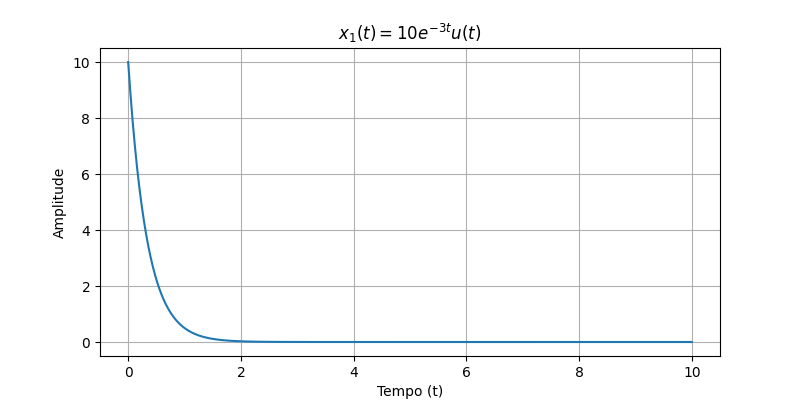

In [4]:
#3a)
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 10, 1000)
x1 = 10 * np.exp(-3 * t) * (t >= 0)

plt.figure(figsize=(8, 4))
plt.plot(t, x1)
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude')
plt.title(r'$x_1(t) = 10e^{-3t}u(t)$')
plt.grid(True)
plt.show()

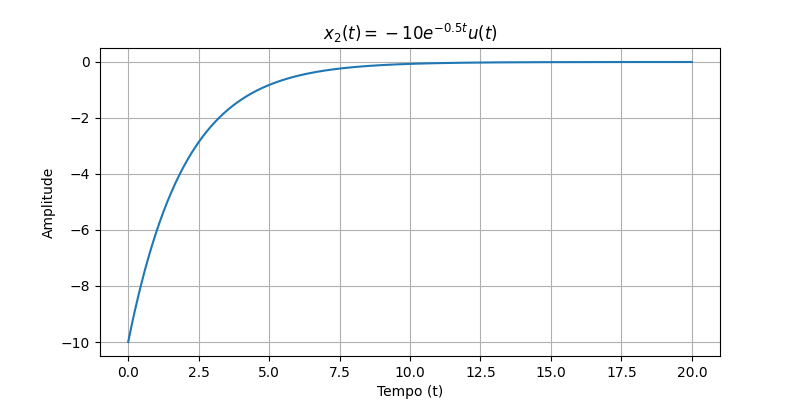

In [5]:
#3b)
t = np.linspace(0, 20, 1000)
x2 = -10 * np.exp(-0.5 * t) * (t >= 0)

plt.figure(figsize=(8, 4))
plt.plot(t, x2)
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude')
plt.title(r'$x_2(t) = -10e^{-0.5t}u(t)$')
plt.grid(True)
plt.show()

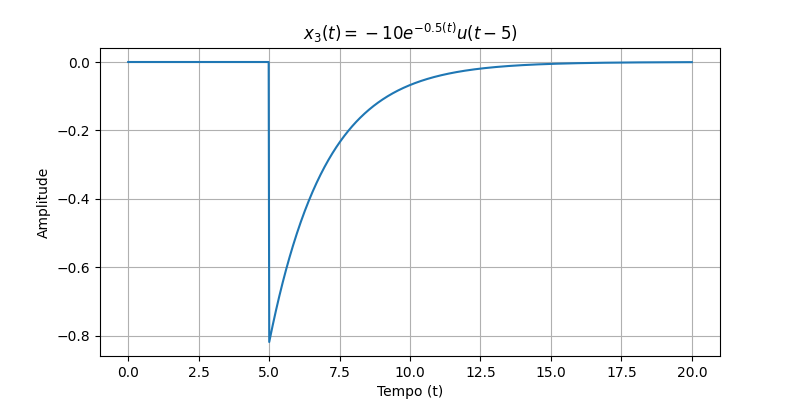

In [6]:
#3c)
t = np.linspace(0, 20, 1000)
x3 = -10 * np.exp(-0.5 * (t)) * (t >= 5)

plt.figure(figsize=(8, 4))
plt.plot(t, x3)
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude')
plt.title(r'$x_3(t) = -10e^{-0.5(t)}u(t-5)$')
plt.grid(True)
plt.show()

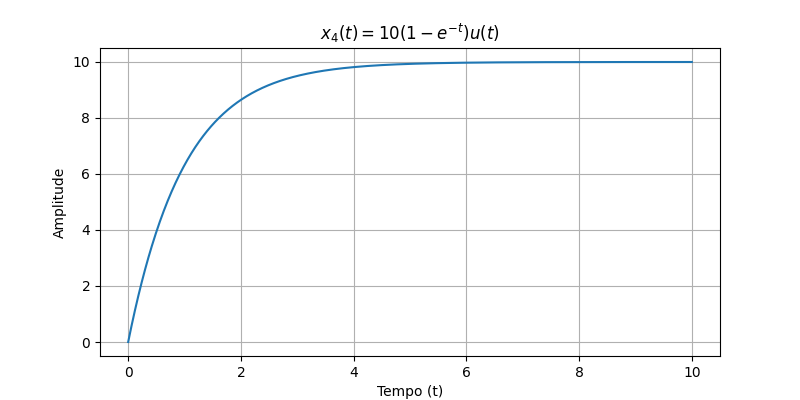

In [7]:
#3d)
t = np.linspace(0, 10, 1000)
x4 = 10 * (1 - np.exp(-t)) * (t >= 0)

plt.figure(figsize=(8, 4))
plt.plot(t, x4)
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude')
plt.title(r'$x_4(t) = 10(1 - e^{-t})u(t)$')
plt.grid(True)
plt.show()

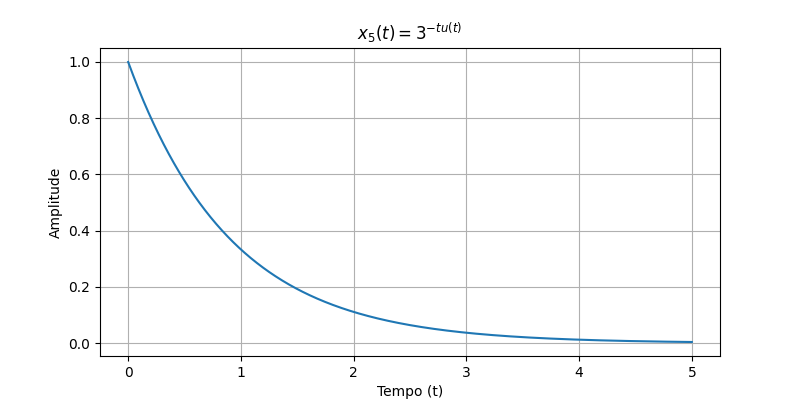

In [9]:
#3e)
t = np.linspace(0, 5, 1000)
x5 = 3**((-t) * (t >= 0))

plt.figure(figsize=(8, 4))
plt.plot(t, x5)
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude')
plt.title(r'$x_5(t) = 3^{-tu(t)}$')
plt.grid(True)
plt.show()

**4-)** Por Frederico Guazzelli

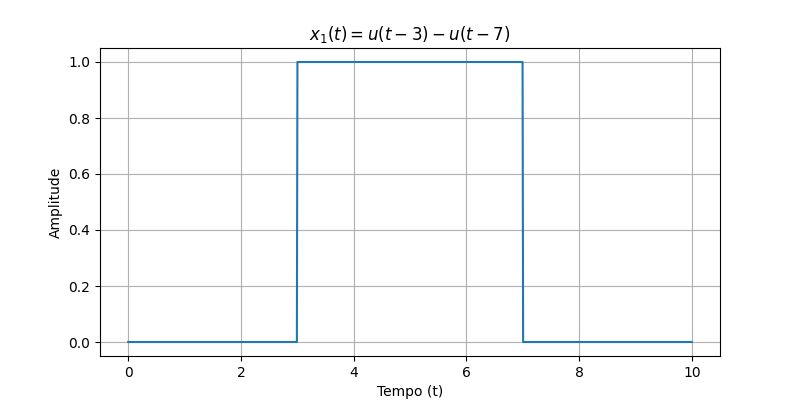

In [8]:
#4a)

t = np.linspace(0, 10, 1000)
x1 = (t >= 3) * 1 - (t >= 7) * 1

plt.figure(figsize=(8, 4))
plt.plot(t, x1)
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude')
plt.title(r'$x_1(t) = u(t-3) - u(t-7)$')
plt.grid(True)
plt.show()

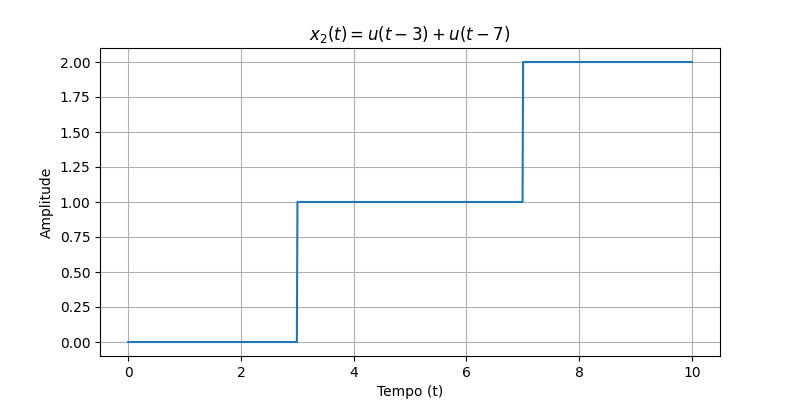

In [11]:
#4b)
t = np.linspace(0, 10, 1000)
x2 = (t >= 3) * 1 + (t >= 7) * 1

plt.figure(figsize=(8, 4))
plt.plot(t, x2)
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude')
plt.title(r'$x_2(t) = u(t-3) + u(t-7)$')
plt.grid(True)
plt.show()


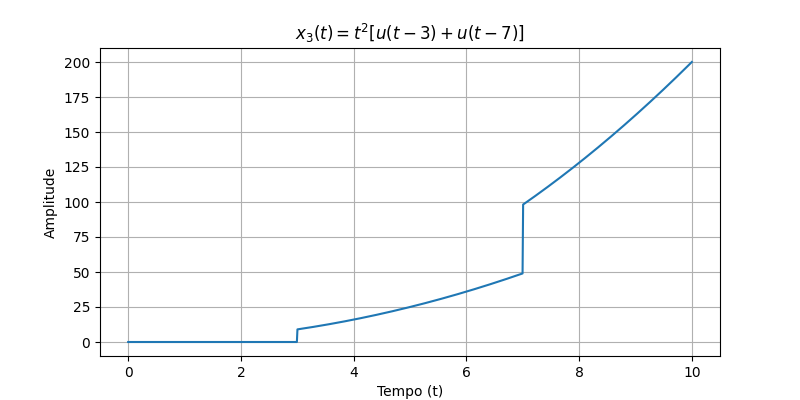

In [10]:
#4c)
t = np.linspace(0, 10, 1000)
x3 = t**2 * ((t >= 3) * 1 + (t >= 7) * 1)

plt.figure(figsize=(8, 4))
plt.plot(t, x3)
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude')
plt.title(r'$x_3(t) = t^2 [u(t-3) + u(t-7)]$')
plt.grid(True)
plt.show()

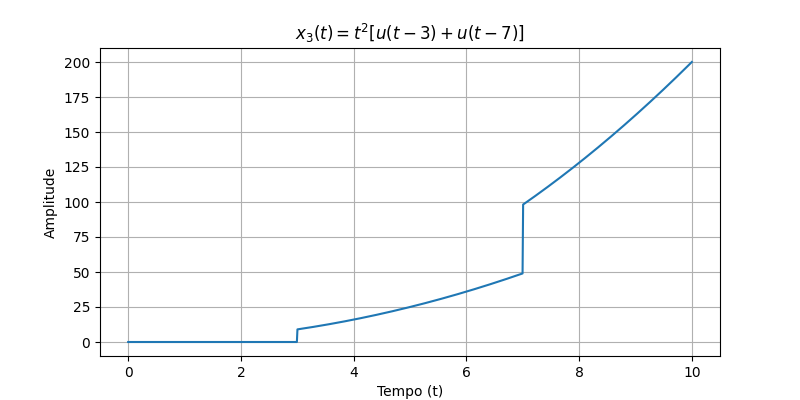

In [12]:
#4d)
t = np.linspace(0, 10, 1000)
x3 = t**2 * ((t >= 3) * 1 + (t >= 7) * 1)

plt.figure(figsize=(8, 4))
plt.plot(t, x3)
plt.xlabel('Tempo (t)')
plt.ylabel('Amplitude')
plt.title(r'$x_3(t) = t^2 [u(t-3) + u(t-7)]$')
plt.grid(True)
plt.show()

**6)** Resolvido por Frederico Guazzelli

a) $\int_{-\infty}^\infty\delta(\tau)x(t-\tau)\,d\tau$

Essa integral depende de $x(t-\tau)$ apenas onde $\tau = 0$ então o resultado dela é:
$$x(t)$$

b) $\int_{-\infty}^\infty\delta(t-\tau)x(\tau)\,d\tau$

Essa integral depende de $x(\tau)$ apenas onde $\tau = t$ então o resultado dela é, também:
$$x(t)$$

c) $\int_{-\infty}^\infty\delta(2\tau-4)\mathrm{sen}(\pi \tau)\,d\tau$

Essa integral depende de $sen(\pi\tau)$ apenas onde $2\tau-4 = 0$, ou seja, $\tau=2$, então o resultado dela é:
$$sen(2\pi)=0$$

d) $\int_{-\infty}^\infty\delta(\tau)e^{-j\omega \tau}\,d\tau$

Essa integral depende de $e^{-j\omega\tau}$ apenas onde $\tau=0$, então o resultado dela é:
$$e^{-j\omega0}=1$$

e) $\int_{-\infty}^\infty\delta(\tau+2)e^{-\tau}\,d\tau$

Essa integral depende de $e^{-\tau}$ apenas onde $\tau+2=0$,ou seja, onde $\tau=-2$, então o resultado dela é:
$$e^{-(-2)}=e^2$$

f) $\int_{-\infty}^\infty\delta(1-\tau)(t^2+ 4)\,d\tau$

Essa integral depende de $t^2+4$ apenas onde $1-\tau=0$,ou seja, onde $\tau=1$, então o resultado dela é:
$$t^2+4$$